# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [24]:
X_test = pd.read_csv("X_test.csv", delimiter=',')
X_train = pd.read_csv("X_train_balanceado.csv", delimiter=',')
y_test = pd.read_csv("y_test.csv", delimiter=',')
y_train = pd.read_csv("y_train_balanceado.csv", delimiter=',')

In [25]:
X_test

,Age,Income,Number of Children,Genero_encoded,Estado_Civil,Credit Score_High
0,31.0,67500.0,0,1,1,0
1,29.0,27500.0,0,0,1,0
2,40.0,130000.0,0,1,1,1
3,42.0,100000.0,0,1,1,1
4,50.0,155000.0,0,1,0,1
5,36.0,90000.0,2,0,0,1
6,30.0,117500.0,2,1,0,1
7,31.0,95000.0,0,1,1,1
8,32.0,57500.0,0,1,1,0
9,46.0,95000.0,1,0,0,1


In [26]:
y_test

,Credit Score_Low
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [27]:
y_train

,Credit Score_Low
0,0
1,0
2,0
3,0
4,0
...,...
173,1
174,1
175,1
176,1


In [28]:
contagem_classes = y_train_bal.value_counts()

print("Contagem de amostras por classe:")
print(contagem_classes)

Contagem de amostras por classe:
Credit Score_Low
0    89
1    89
Name: count, dtype: int64


In [29]:
X_train

,Age,Income,Number of Children,Genero_encoded,Estado_Civil,Credit Score_High
0,36.000000,85000.000000,2,0,0,1
1,33.000000,52500.000000,0,1,1,0
2,40.000000,130000.000000,0,1,1,1
3,43.000000,95000.000000,0,1,1,1
4,49.000000,65000.000000,1,0,0,1
...,...,...,...,...,...,...
173,28.390436,30547.821670,0,0,1,0
174,28.000000,32500.000000,0,0,1,0
175,28.051479,32242.606244,0,0,1,0
176,27.278646,36106.767679,0,0,1,0


# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

Com os dados devidamente tratados, balanceados e saparados em treino e teste podemos comecar a fase de treino e avaliação da mesma, no qual ao aplicar o algoritimo ultilizando o criterio Gini e random state, logo após iremos avaliar como o modelo vai se sair com testes como a acuracia, recall, presisão e F1-score essa é a etapa mais importante do modelo pois conseguiremos saber se nosso modelo se está ajustado aos dados fornecidos. No entanto nossa arvore pode sofrer de overfitting e para impedir e melhorar nosso algoritimo podemos alterar alguns parametros da arvore procurando melhora-lá.


# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modedlo com os dados de treino.

In [30]:
arvore_score = DecisionTreeClassifier (criterion = 'gini', random_state = 0)
#arvore_churn é o nome que escolho para meu classificador
# 'criterion' define o critério para medir a qualidade da divisão (usando o índice de Gini neste caso)
# 'random_state' define a semente aleatória para garantir a reprodutibilidade dos resultados
arvore_score.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [31]:
previsoes = arvore_score.predict(X_train)
acuracia = accuracy_score(y_train, previsoes)
print("Acurácia:", acuracia)

Acurácia: 1.0


# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [32]:
arvore_score = DecisionTreeClassifier (criterion = 'gini', random_state = 0)
#arvore_churn é o nome que escolho para meu classificador
# 'criterion' define o critério para medir a qualidade da divisão (usando o índice de Gini neste caso)
# 'random_state' define a semente aleatória para garantir a reprodutibilidade dos resultados
arvore_score.fit(X_test, y_test)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [33]:
previsoes = arvore_score.predict(X_test)
acuracia = accuracy_score(y_test, previsoes)
print("Acurácia:", acuracia)

Acurácia: 1.0


In [38]:
relatorio = classification_report(y_test, previsoes)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00         3

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

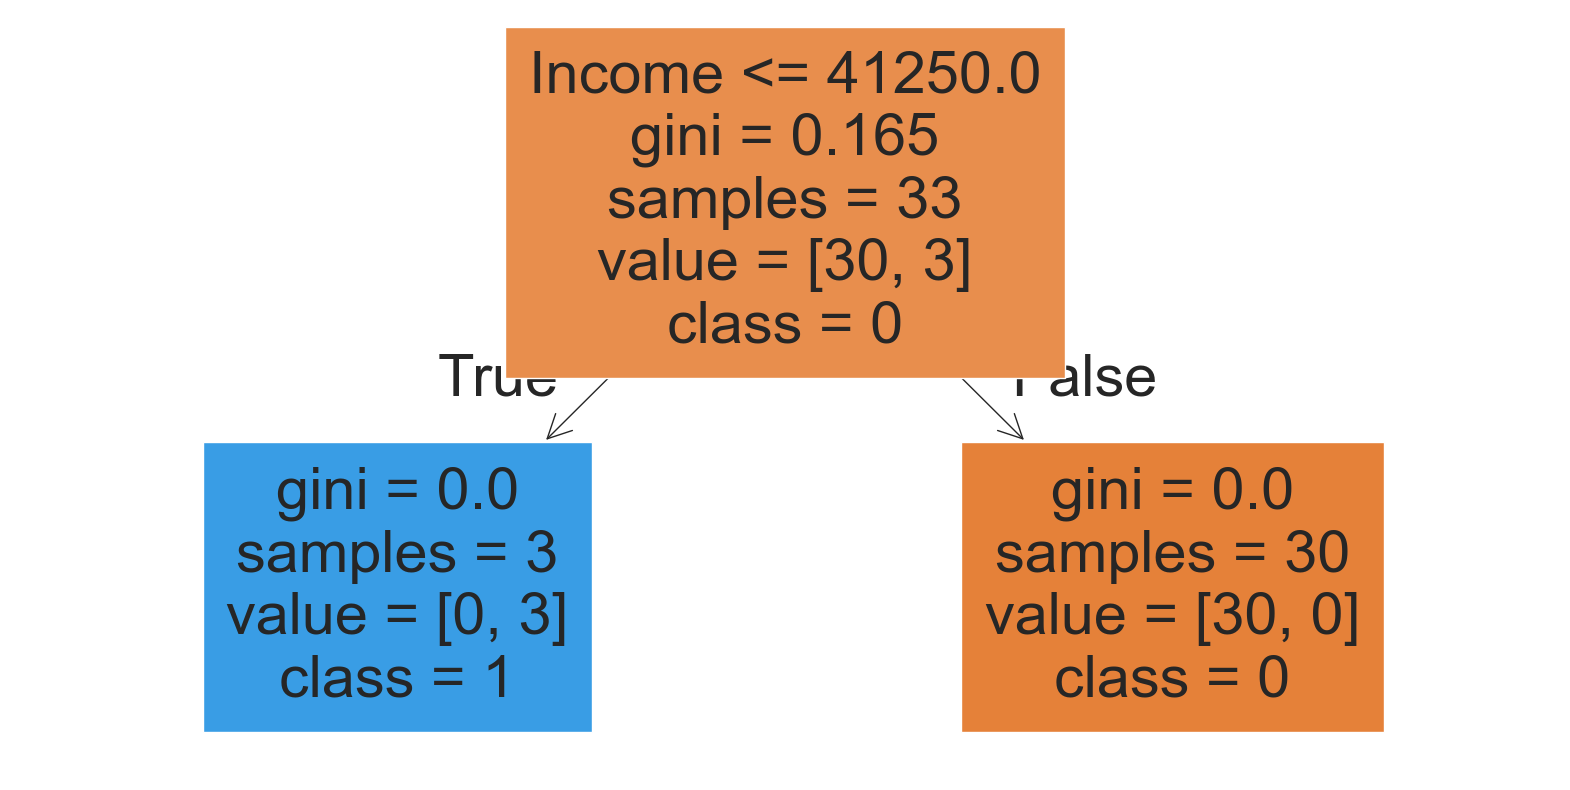

In [35]:
plt.figure(figsize=(20,10))
plot_tree(arvore_score, filled=True, feature_names=X_test.columns, class_names=['0', '1'])
plt.show()

Sim é possivel fazer uma avaliação visual por conta de sua profundidade que é apenas 1

# 6) Identifique as 2 principais features do modelo.


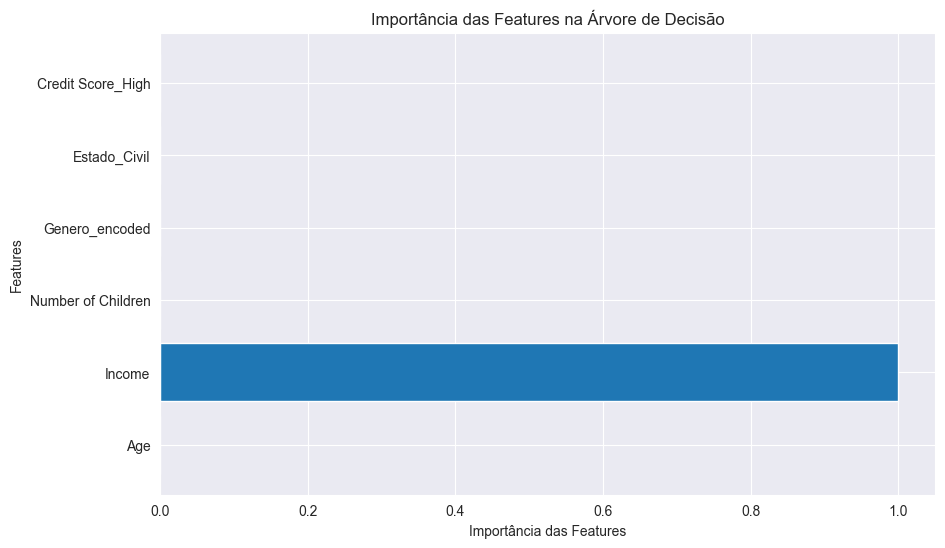

In [37]:
# Obtendo a importância das características do modelo de árvore de decisão
importancias_features = arvore_score.feature_importances_

# Obtendo os nomes das características
nomes_features = X_test.columns

# Criando um gráfico de barras para visualizar a importância das características
plt.figure(figsize=(10, 6))
plt.barh(nomes_features, importancias_features)
plt.xlabel('Importância das Features')
plt.ylabel('Features')
plt.title('Importância das Features na Árvore de Decisão')
plt.show()

# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [ ]:
#seu código aqui

# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

In [ ]:
#Seu texto aqui